In [1]:
import pandas as pd
import missingno as msno
import scipy

In [2]:
df = pd.read_csv("datasets/$OCEAN tweets dataset.csv")
dfPrice = pd.read_csv("datasets/OCEAN token price dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229857 entries, 0 to 229856
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               229857 non-null  int64  
 1   conversation_id  229857 non-null  int64  
 2   created_at       229857 non-null  object 
 3   date             229857 non-null  object 
 4   time             229857 non-null  object 
 5   timezone         229857 non-null  int64  
 6   user_id          229857 non-null  int64  
 7   username         229857 non-null  object 
 8   name             229839 non-null  object 
 9   place            0 non-null       float64
 10  tweet            229857 non-null  object 
 11  language         229857 non-null  object 
 12  mentions         229857 non-null  object 
 13  urls             229857 non-null  object 
 14  photos           229857 non-null  object 
 15  replies_count    229857 non-null  int64  
 16  retweets_count   229857 non-null  int6

<AxesSubplot:>

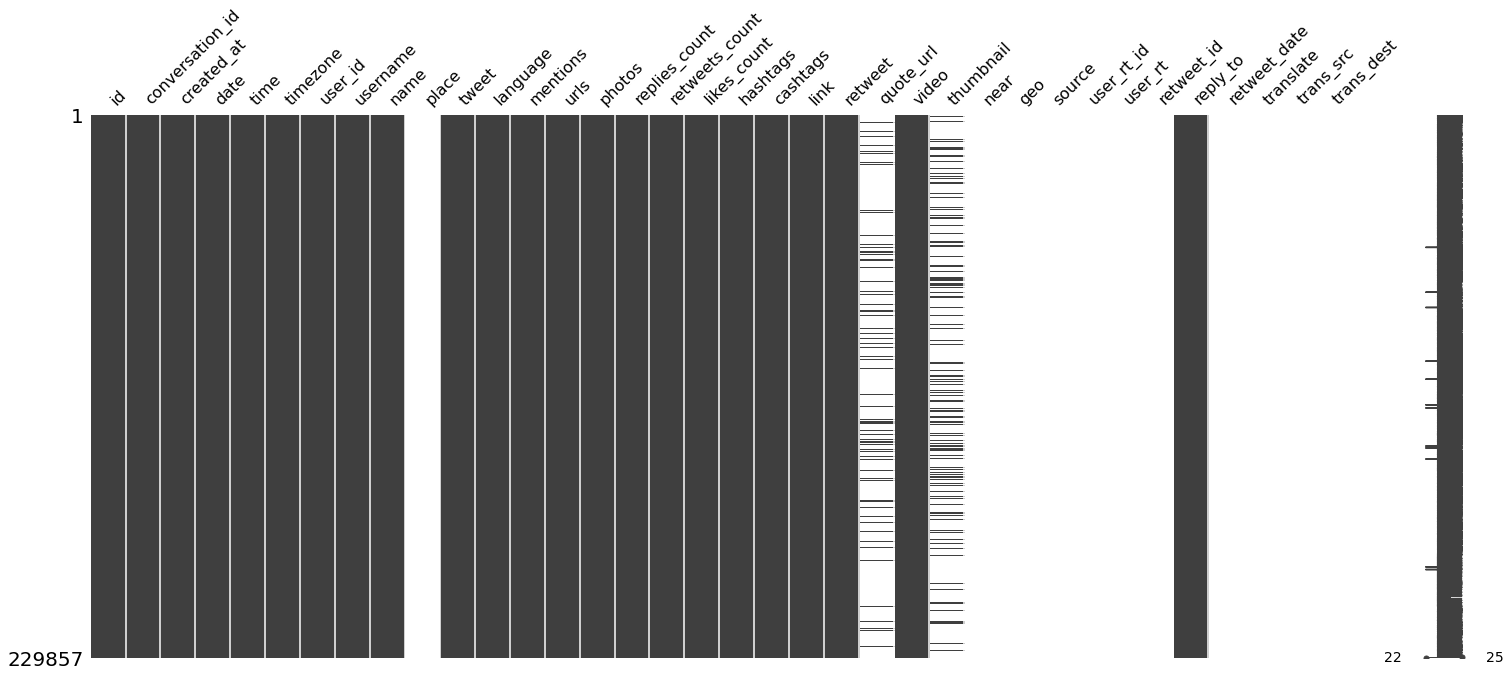

In [4]:
msno.matrix(df)

In [5]:
df = df.dropna(axis=1, how='all')

In [6]:
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,reply_to
0,1583608299085500416,1583289720846618627,2022-10-22 02:56:55 GTB (heure d’été),2022-10-22,02:56:55,300,1265742995636326401,mxyzptlk07,Mxyzptlk,"@JakeGagain Get an $OCEAN bag, no matter how s...",...,0,4,"['data', 'web3']",['ocean'],https://twitter.com/Mxyzptlk07/status/15836082...,False,NaN,0,NaN,"[{'screen_name': 'JakeGagain', 'name': 'Jake G..."
1,1583607565543669761,1583607565543669761,2022-10-22 02:54:00 GTB (heure d’été),2022-10-22,02:54:00,300,1265742995636326401,mxyzptlk07,Mxyzptlk,Great! Let's go #datascientists💪 Do you have ...,...,0,0,"['datascientists', 'buidl', 'anewdataeconomy']",['ocean'],https://twitter.com/Mxyzptlk07/status/15836075...,False,https://twitter.com/oceanprotocol/status/15834...,0,NaN,[]
2,1583603064044367872,1583603064044367872,2022-10-22 02:36:07 GTB (heure d’été),2022-10-22,02:36:07,300,1319369787848405003,moonhodler2,MOONHODLER,"""The Energy Efficiency Data challenge is desig...",...,0,0,['data'],['ocean'],https://twitter.com/Moonhodler2/status/1583603...,False,https://twitter.com/oceanprotocol/status/15834...,0,NaN,[]
3,1583598008511664128,1583595613903417344,2022-10-22 02:16:01 GTB (heure d’été),2022-10-22,02:16:01,300,3275094379,rjgaurav338,rikdbxs,"@CryptoGemsCom I have been buying $OCEAN, $BNB...",...,0,0,[],"['ocean', 'bnb', 'eth']",https://twitter.com/rjgaurav338/status/1583598...,False,NaN,0,NaN,"[{'screen_name': 'CryptoGemsCom', 'name': 'The..."
4,1583595987851173888,1583557616558833665,2022-10-22 02:07:59 GTB (heure d’été),2022-10-22,02:07:59,300,1258748447873806336,stringerbcoiner,StringerBitcoiner,"@cryptoworld202 $OCEAN, $LTC, $NGM and $DAFI a...",...,0,2,"['ngm', 'dafi', 'ngm']","['ocean', 'ltc', 'ngm', 'dafi', 'esek', 'enok'...",https://twitter.com/StringerBcoiner/status/158...,False,NaN,1,https://pbs.twimg.com/media/FfoQJTUWQAMjfYy.jpg,"[{'screen_name': 'cryptoworld202', 'name': 'Cr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229852,1211845595977019392,1211774284965859328,2019-12-31 05:04:39 GTB,2019-12-31,05:04:39,300,3307664430,mojo_crypto_btc,🦍🔥 ✧🔮 ጠዐጋዐ ƈཞ ⓨ ℘ɬዐ🔮✧ 🔥🦍 JNGL,@Pentoshiswallet Solid picks... I’d replace $x...,...,0,3,[],"['xrp', 'perl', 'nrg', 'ocean']",https://twitter.com/Mojo_Crypto_BTC/status/121...,False,NaN,0,NaN,[]
229853,1211830366513901568,1211782150443479042,2019-12-31 04:04:08 GTB,2019-12-31,04:04:08,300,897905830334533632,harmoniccapital,Harmonic Capital,"@DaveCryptos $Sharering, $ocean, Blocktrade lol",...,0,0,[],['ocean'],https://twitter.com/harmoniccapital/status/121...,False,NaN,0,NaN,"[{'screen_name': 'DaveCryptos', 'name': 'Dave ..."
229854,1211818209738817536,1211818209738817536,2019-12-31 03:15:50 GTB,2019-12-31,03:15:50,300,999799024273141760,bakeobits,ShillSilverstein.kek 📈👑📉,There's a good chance that $INS is going to pu...,...,0,1,[],"['ins', 'ocean', 'ins']",https://twitter.com/bakeobits/status/121181820...,False,NaN,0,NaN,[]
229855,1211808120659300352,1211808120659300352,2019-12-31 02:35:44 GTB,2019-12-31,02:35:44,300,999799024273141760,bakeobits,ShillSilverstein.kek 📈👑📉,$OCEAN here with 3RV Chart Pattern https://t....,...,0,0,[],['ocean'],https://twitter.com/bakeobits/status/121180812...,False,NaN,1,https://pbs.twimg.com/media/ENE1D4GUYAAWcVh.jpg,[]


In [7]:
df.describe()

,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video
count,2.298570e+05,2.298570e+05,229857.0,2.298570e+05,229857.000000,229857.000000,229857.000000,229857.000000
mean,1.388471e+18,1.388247e+18,300.0,9.547958e+17,0.977808,1.392392,7.526432,0.249368
std,8.747361e+16,8.763361e+16,0.0,5.177097e+17,11.622383,12.767167,45.084299,0.432648
min,1.211808e+18,7.704110e+17,300.0,9.318000e+03,0.000000,0.000000,0.000000,0.000000
25%,1.321486e+18,1.321302e+18,300.0,8.949127e+17,0.000000,0.000000,0.000000,0.000000
50%,1.368327e+18,1.368224e+18,300.0,1.165705e+18,0.000000,0.000000,2.000000,0.000000
75%,1.451994e+18,1.451852e+18,300.0,1.306244e+18,1.000000,1.000000,5.000000,0.000000
max,1.583608e+18,1.583608e+18,300.0,1.583420e+18,3201.000000,2556.000000,6363.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229857 entries, 0 to 229856
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               229857 non-null  int64 
 1   conversation_id  229857 non-null  int64 
 2   created_at       229857 non-null  object
 3   date             229857 non-null  object
 4   time             229857 non-null  object
 5   timezone         229857 non-null  int64 
 6   user_id          229857 non-null  int64 
 7   username         229857 non-null  object
 8   name             229839 non-null  object
 9   tweet            229857 non-null  object
 10  language         229857 non-null  object
 11  mentions         229857 non-null  object
 12  urls             229857 non-null  object
 13  photos           229857 non-null  object
 14  replies_count    229857 non-null  int64 
 15  retweets_count   229857 non-null  int64 
 16  likes_count      229857 non-null  int64 
 17  hashtags  

In [9]:
howTo = {'replies_count' : ['sum', 'mean', 'count'], 'retweets_count' : ['sum', 'mean'], 'likes_count' : ['sum', 'mean', 'median', 'max', 'min'], 'video' : ['sum', 'mean'], 'username': ['nunique']}

aggr = df.groupby('date').agg(howTo)

In [13]:
aggr.columns

MultiIndex([( 'replies_count',     'sum'),
            ( 'replies_count',    'mean'),
            ( 'replies_count',   'count'),
            ('retweets_count',     'sum'),
            ('retweets_count',    'mean'),
            (   'likes_count',     'sum'),
            (   'likes_count',    'mean'),
            (   'likes_count',  'median'),
            (   'likes_count',     'max'),
            (   'likes_count',     'min'),
            (         'video',     'sum'),
            (         'video',    'mean'),
            (      'username', 'nunique')],
           )

In [15]:
data = pd.merge(aggr, dfPrice, right_on='Date', left_index=True)

/tmp/ipykernel_34529/737906687.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  data = pd.merge(aggr, dfPrice, right_on='Date', left_index=True)


In [16]:
data.columns

Index([  ('replies_count', 'sum'),  ('replies_count', 'mean'),
       ('replies_count', 'count'),  ('retweets_count', 'sum'),
       ('retweets_count', 'mean'),     ('likes_count', 'sum'),
          ('likes_count', 'mean'),  ('likes_count', 'median'),
           ('likes_count', 'max'),     ('likes_count', 'min'),
                 ('video', 'sum'),          ('video', 'mean'),
          ('username', 'nunique'),                     'Date',
                           'Open',                     'High',
                            'Low',                    'Close',
                      'Adj Close',                   'Volume'],
      dtype='object')

In [18]:
r, p = scipy.stats.pearsonr(data[('replies_count','sum')], data['Adj Close'])
print(r, p)

0.47172896295343236 6.411027703920787e-58


In [19]:
r, p = scipy.stats.spearmanr(data[('replies_count','sum')], data['Adj Close'])
print(r, p)

0.5431614244725638 1.0046772308129632e-79


In [20]:
r, p = scipy.stats.pearsonr(data[('likes_count', 'mean')], data['Adj Close'])
print(r, p)

0.33522772999668793 2.437897735900393e-28


In [21]:
r, p = scipy.stats.spearmanr(data[('likes_count', 'mean')], data['Adj Close'])
print(r, p)

0.32580073157252937 8.98001645408542e-27


In [22]:
r, p = scipy.stats.pearsonr(data['retweets_count', 'mean'], data['Adj Close'])
print(r, p)

0.23973088935331774 7.282070076470603e-15


In [23]:
r, p = scipy.stats.spearmanr(data['retweets_count', 'mean'], data['Adj Close'])
print(r, p)

0.237256407572208 1.3951589504296565e-14


In [24]:
r, p = scipy.stats.pearsonr(data[('username', 'nunique')], data['Adj Close'])
print(r, p)

0.4984106253165346 1.8255037487725145e-65


In [25]:
r, p = scipy.stats.spearmanr(data[('username', 'nunique')], data['Adj Close'])
print(r, p)

0.5393424319385214 2.0134232676274137e-78
